In [385]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#checking no of null entries
data = pd.read_csv('Jonathan_train.csv')
data

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [387]:
data.drop(columns=['Colour'],inplace=True)

In [388]:
data['Year'].unique()

array(['2,011', '2,012', '2,010', '2,017', '2,002', '2,019', '2,015',
       '2,004', '2,003', '2,008', '2,018', '2,020', '2,006', '2,016',
       '2,014', '2,007', '2,009', '2,005', '2,021', '2,013', '2,000', nan,
       '1,992', '2,001', '1,997', '1,999', '1,993', '1,998', '1,986',
       '1,996', '2,022', '1,995', '1,979', '1,989'], dtype=object)

In [389]:
data['Year']=data['Year'].fillna('0')
data['Year']=data['Year'].str.replace(',','')
data.Year = data.Year.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7008 non-null   object 
 7   Distance                4845 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 422.3+ KB


In [390]:
data['Year'].replace(0, np.nan, inplace = True)

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   float64
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7008 non-null   object 
 7   Distance                4845 non-null   object 
dtypes: float64(2), object(6)
memory usage: 450.4+ KB


In [392]:
data['Year'] = data.groupby(['Maker'])['Year'].transform(lambda x:x.fillna(x.mode()[0]))

In [393]:
data.Year = data.Year.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7008 non-null   object 
 7   Distance                4845 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 422.3+ KB


C:\PROGRA~1\KMSpico\temp/ipykernel_12588/3573937608.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")


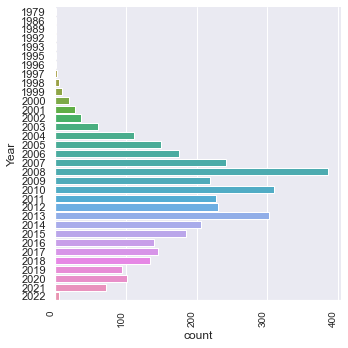

In [394]:
sns.set_theme()
sns.catplot(data = data, y="Year", kind = 'count' )
ax = sns.countplot(y="Year",data = data)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7008 non-null   object 
 7   Distance                4845 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 422.3+ KB


In [396]:
year_inv = data[data['Year'].isna()]
year_inv

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance


In [397]:
year_inv['Year']=year_inv['Year'].fillna(0)
year_inv

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance


In [398]:
year_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               0 non-null      object 
 1   Location                0 non-null      object 
 2   Maker                   0 non-null      object 
 3   Model                   0 non-null      object 
 4   Year                    0 non-null      int32  
 5   Amount (Million Naira)  0 non-null      float64
 6   Type                    0 non-null      object 
 7   Distance                0 non-null      object 
dtypes: float64(1), int32(1), object(6)
memory usage: 0.0+ bytes


In [399]:
data['Amount (Million Naira)'].unique()

array([2.200e+00, 3.500e+00, 9.200e+00, 2.280e+01, 2.600e+00, 7.500e+00,
       7.900e+01, 9.000e+00, 7.760e+00, 2.500e+00, 7.200e+00, 3.260e+00,
       1.910e+00, 6.950e+00, 1.700e+01, 3.550e+00, 2.200e+01, 2.300e+01,
       1.400e+01, 4.900e+00, 2.480e+00, 1.600e+01, 4.600e+00, 1.500e+01,
       1.185e+01, 4.100e+00, 4.500e+00, 4.200e+00, 7.800e+00, 5.900e+00,
       4.000e+00, 2.400e+00, 3.000e+00, 3.200e+00, 2.660e+00, 1.150e+02,
       3.300e+00, 5.500e+00, 3.850e+00, 2.300e+00, 5.890e+01, 2.800e+00,
       6.500e+00, 8.250e+00, 6.800e+00, 2.080e+00, 1.460e+00, 3.600e+00,
       6.850e+00, 3.750e+00, 1.000e+01, 2.810e+00, 1.800e+00, 6.750e+01,
       1.500e+00, 1.690e+00, 6.730e+00, 9.500e+00, 5.780e+00, 9.700e+00,
       3.800e+00, 8.440e+00, 4.450e+00, 2.900e+01, 1.125e+01, 2.050e+00,
       2.150e+01, 3.590e+00, 5.400e+00, 1.069e+01, 1.190e+01, 7.400e+00,
       8.680e+00, 8.500e+00, 1.200e+00, 7.310e+00, 3.950e+00, 6.000e+00,
       1.080e+01, 5.200e+01, 1.655e+01, 4.500e+01, 

In [400]:
data

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,2010,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,2002,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,2018,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,2007,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,2010,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,2012,8.65,Foreign Used,"85,750"


In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7008 non-null   object 
 7   Distance                4845 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 422.3+ KB


C:\PROGRA~1\KMSpico\temp/ipykernel_12588/3419243905.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")


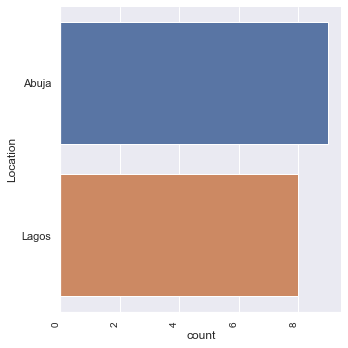

In [402]:
am_inv = data[data['Amount (Million Naira)'].isna()]
am_inv

sns.set_theme()
sns.catplot(data = am_inv, y="Location", kind = 'count' )
ax = sns.countplot(y="Location",data = am_inv)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [403]:
data.dropna(subset = ['Amount (Million Naira)'], inplace = True) 

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7188 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    6992 non-null   object 
 7   Distance                4836 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 477.3+ KB


In [405]:
am_inv = data[data['Amount (Million Naira)'].isna()]
am_inv

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance


In [406]:
data['Type'].unique()

array(['Nigerian Used', 'Foreign Used', 'Brand New', nan], dtype=object)

In [407]:
ty_inv = data[data['Type'].isna()]
ty_inv

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
52,VHL10028,Lagos,Nissan,Maxima,2010,2.08,NaN,"139,938"
72,VHL14589,Lagos,Mercedes-Benz,GLK-Class,2010,6.73,NaN,"156,155"
86,VHL13332,Lagos,Honda,Pilot,2007,3.59,NaN,"303,353"
154,VHL17057,Lagos,Hyundai,Sonata,2009,1.80,NaN,"164,003"
170,VHL18853,Abuja,Toyota,Camry,2015,5.16,NaN,"86,280"
...,...,...,...,...,...,...,...,...
7041,VHL14041,Lagos,Hyundai,Sonata,2015,6.73,NaN,"126,473"
7055,VHL14085,Lagos,Fiat,Fullback,2017,11.70,NaN,174
7071,VHL10138,Lagos,Volkswagen,Passat,2010,3.40,NaN,"143,153"
7081,VHL10796,Ibadan,Mercedes-Benz,C240,2002,2.92,NaN,"126,540"


C:\PROGRA~1\KMSpico\temp/ipykernel_12588/2541015401.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")


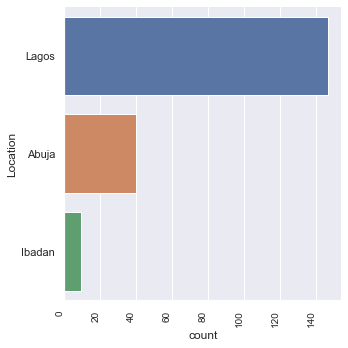

In [408]:
sns.set_theme()
sns.catplot(data = ty_inv, y="Location", kind = 'count' )
ax = sns.countplot(y="Location",data = ty_inv)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")
plt.tight_layout()
plt.show()

C:\PROGRA~1\KMSpico\temp/ipykernel_12588/1252230553.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")


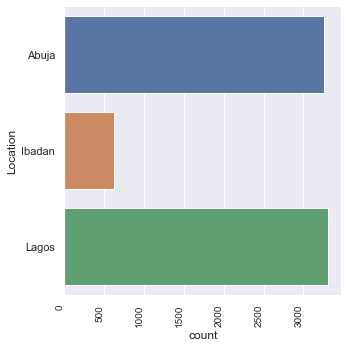

In [409]:
sns.set_theme()
sns.catplot(data = data, y="Location", kind = 'count' )
ax = sns.countplot(y="Location",data = data)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [410]:
data['Type'] = data.groupby(['Location'])['Type'].transform(lambda x:x.fillna(x.mode()[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7188 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7188 non-null   object 
 7   Distance                4836 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 735.4+ KB


In [411]:
data.iloc[52]

VehicleID                     VHL10028
Location                         Lagos
Maker                           Nissan
Model                           Maxima
Year                              2010
Amount (Million Naira)            2.08
Type                      Foreign Used
Distance                       139,938
Name: 52, dtype: object

In [412]:
data.iloc[170]

VehicleID                     VHL18853
Location                         Abuja
Maker                           Toyota
Model                            Camry
Year                              2015
Amount (Million Naira)            5.16
Type                      Foreign Used
Distance                        86,280
Name: 170, dtype: object

In [413]:
data.iloc[7081]

VehicleID                      VHL19831
Location                          Abuja
Maker                            Toyota
Model                        Corolla LE
Year                               2006
Amount (Million Naira)             1.85
Type                      Nigerian Used
Distance                            NaN
Name: 7098, dtype: object

In [414]:
data['Distance'].unique()

array([nan, '125,000', '110,852', ..., '114,257', '85,750', '83,308'],
      dtype=object)

In [415]:
dist_inv = data[data['Distance'].isna()]
dist_inv

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,2.20,Nigerian Used,NaN
5,VHL19996,Lagos,Toyota,Venza V6,2011,7.50,Foreign Used,NaN
6,VHL16314,Lagos,Lexus,LX 570 AWD,2019,79.00,Foreign Used,NaN
7,VHL14299,Abuja,Toyota,Avalon,2015,9.00,Foreign Used,NaN
13,VHL10209,Lagos,Toyota,Venza V6 AWD,2010,6.95,Foreign Used,NaN
...,...,...,...,...,...,...,...,...
7188,VHL11708,Ibadan,Toyota,RAV4 Limited V6 4x4,2007,3.00,Nigerian Used,NaN
7189,VHL17307,Abuja,BMW,320i SV Premium,2014,6.50,Nigerian Used,NaN
7194,VHL12098,Abuja,Honda,Accord,2005,1.10,Nigerian Used,NaN
7199,VHL17562,Lagos,Toyota,4-Runner Limited V6,2007,5.80,Foreign Used,NaN


In [416]:
data

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,2010,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,2002,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,2018,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,2007,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,2010,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,2012,8.65,Foreign Used,"85,750"


In [417]:
locate = data[data['Type'] == 'Brand New']
locate

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
17,VHL16048,Abuja,Toyota,Hilux,2020,23.0,Brand New,"7,523"
38,VHL14714,Abuja,Toyota,Hilux,2021,23.0,Brand New,100
100,VHL11970,Lagos,Lexus,LX,2018,52.0,Brand New,NaN
107,VHL10039,Abuja,Mercedes-Benz,G-Class G 63 AMG,2021,195.0,Brand New,NaN
109,VHL13623,Abuja,Toyota,RAV4 Limited FWD,2020,27.0,Brand New,854
...,...,...,...,...,...,...,...,...
7087,VHL17809,Lagos,Toyota,Camry XSE V6 FWD,2020,27.0,Brand New,NaN
7112,VHL16487,Lagos,Toyota,Highlander,2021,30.0,Brand New,NaN
7142,VHL13680,Abuja,Mercedes-Benz,GLE-Class,2022,150.0,Brand New,NaN
7149,VHL16866,Lagos,Lexus,LX 570 AWD,2020,90.0,Brand New,NaN


In [418]:
locate2 = dist_inv[dist_inv['Type'] == 'Brand New']
locate2

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
100,VHL11970,Lagos,Lexus,LX,2018,52.0,Brand New,NaN
107,VHL10039,Abuja,Mercedes-Benz,G-Class G 63 AMG,2021,195.0,Brand New,NaN
155,VHL15049,Abuja,Lexus,LX 570 (5 Seats) AWD,2021,87.5,Brand New,NaN
257,VHL17091,Abuja,Toyota,Land Cruiser 5.7 V8 VXR,2020,49.5,Brand New,NaN
273,VHL16276,Abuja,Mercedes-Benz,E55,2021,76.5,Brand New,NaN
...,...,...,...,...,...,...,...,...
6993,VHL17940,Abuja,Mercedes-Benz,E300,2022,78.0,Brand New,NaN
7087,VHL17809,Lagos,Toyota,Camry XSE V6 FWD,2020,27.0,Brand New,NaN
7112,VHL16487,Lagos,Toyota,Highlander,2021,30.0,Brand New,NaN
7142,VHL13680,Abuja,Mercedes-Benz,GLE-Class,2022,150.0,Brand New,NaN


In [419]:
dist_inv['Distance']=dist_inv['Distance'].fillna('0')
dist_inv['Distance']=dist_inv['Distance'].str.replace(',','')
dist_inv.Distance = dist_inv.Distance.astype(int)
dist_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 7202
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               2352 non-null   object 
 1   Location                2352 non-null   object 
 2   Maker                   2352 non-null   object 
 3   Model                   2352 non-null   object 
 4   Year                    2352 non-null   int32  
 5   Amount (Million Naira)  2352 non-null   float64
 6   Type                    2352 non-null   object 
 7   Distance                2352 non-null   int32  
dtypes: float64(1), int32(2), object(5)
memory usage: 147.0+ KB


C:\PROGRA~1\KMSpico\temp/ipykernel_12588/1568941803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_inv['Distance']=dist_inv['Distance'].fillna('0')
C:\PROGRA~1\KMSpico\temp/ipykernel_12588/1568941803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist_inv['Distance']=dist_inv['Distance'].str.replace(',','')
C:\Users\JONATHAN\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [420]:
dist_inv['Distance'].replace(0, np.nan, inplace = True)

C:\Users\JONATHAN\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


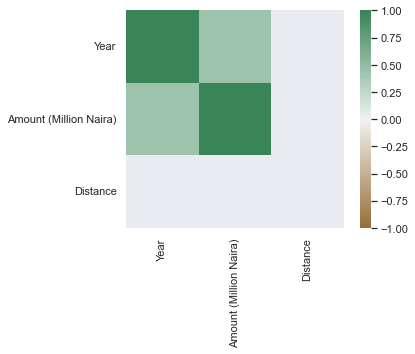

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_data = dist_inv.corr()
axis_corr = sns.heatmap(
correlation_data,
vmin = -1, vmax = 1, center = 0,
cmap = sns.diverging_palette(50, 500, n = 500),
square = True
)
plt.show()

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7188 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7188 non-null   object 
 7   Distance                4836 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 735.4+ KB


C:\PROGRA~1\KMSpico\temp/ipykernel_12588/3748597998.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")


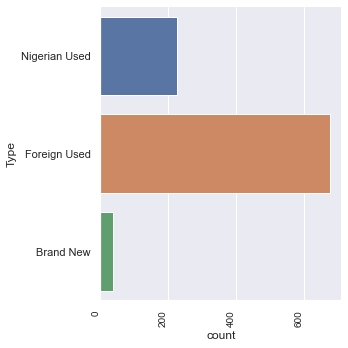

In [423]:
sns.set_theme()
sns.catplot(data = dist_inv, y="Type", kind = 'count' )
ax = sns.countplot(y="Type",data = dist_inv)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")
plt.tight_layout()
plt.show()

C:\PROGRA~1\KMSpico\temp/ipykernel_12588/687714453.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")


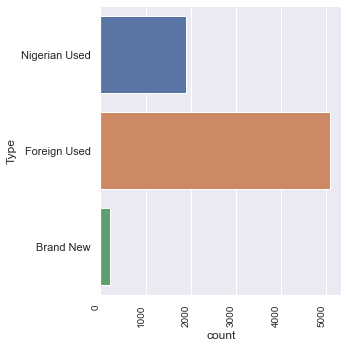

In [424]:
sns.set_theme()
sns.catplot(data = data, y="Type", kind = 'count' )
ax = sns.countplot(y="Type",data = data)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [425]:
data['Distance']=data['Distance'].fillna('0')
data['Distance']=data['Distance'].str.replace(',','')
data.Distance = data.Distance.astype(int)
data['Distance'].replace(0, np.nan, inplace = True)
data

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012,3.50,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,2010,9.20,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,22.80,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002,2.60,Nigerian Used,125206.0
...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,2018,5.70,Foreign Used,65000.0
7201,VHL10637,Abuja,BMW,X3,2007,4.00,Nigerian Used,200000.0
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,2010,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,2012,8.65,Foreign Used,85750.0


In [426]:
data['Distance'].fillna(data.groupby(['Type'])['Distance'].transform('mean'), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7188 non-null   object 
 1   Location                7188 non-null   object 
 2   Maker                   7188 non-null   object 
 3   Model                   7188 non-null   object 
 4   Year                    7188 non-null   int32  
 5   Amount (Million Naira)  7188 non-null   float64
 6   Type                    7188 non-null   object 
 7   Distance                7188 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 735.4+ KB


In [427]:
data

,VehicleID,Location,Maker,Model,Year,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,2.20,Nigerian Used,144940.22466
1,VHL18827,Ibadan,Hyundai,Sonata,2012,3.50,Nigerian Used,125000.00000
2,VHL19499,Lagos,Lexus,RX 350,2010,9.20,Foreign Used,110852.00000
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,22.80,Foreign Used,30000.00000
4,VHL12170,Ibadan,Toyota,Highlander,2002,2.60,Nigerian Used,125206.00000
...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,2018,5.70,Foreign Used,65000.00000
7201,VHL10637,Abuja,BMW,X3,2007,4.00,Nigerian Used,200000.00000
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,2010,2.85,Nigerian Used,144940.22466
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,2012,8.65,Foreign Used,85750.00000


In [428]:
favbev = pd.get_dummies (data['Location'])

favbev3 = pd.get_dummies (data['Type'])

data.drop(columns=['VehicleID','Location','Type'],inplace=True)

data = pd.concat([favbev, data], axis = 1)

data = pd.concat([favbev3, data], axis = 1)
data

,Brand New,Foreign Used,Nigerian Used,Abuja,Ibadan,Lagos,Maker,Model,Year,Amount (Million Naira),Distance
0,0,0,1,1,0,0,Honda,Accord Coupe EX V-6,2011,2.20,144940.22466
1,0,0,1,0,1,0,Hyundai,Sonata,2012,3.50,125000.00000
2,0,1,0,0,0,1,Lexus,RX 350,2010,9.20,110852.00000
3,0,1,0,1,0,0,Mercedes-Benz,GLE-Class,2017,22.80,30000.00000
4,0,0,1,0,1,0,Toyota,Highlander,2002,2.60,125206.00000
...,...,...,...,...,...,...,...,...,...,...,...
7200,0,1,0,1,0,0,Honda,Civic,2018,5.70,65000.00000
7201,0,0,1,1,0,0,BMW,X3,2007,4.00,200000.00000
7202,0,0,1,1,0,0,Toyota,RAV4 2.5 Limited 4x4,2010,2.85,144940.22466
7203,0,1,0,0,0,1,Mercedes-Benz,GLK-Class 350,2012,8.65,85750.00000


In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand New               7188 non-null   uint8  
 1   Foreign Used            7188 non-null   uint8  
 2   Nigerian Used           7188 non-null   uint8  
 3   Abuja                   7188 non-null   uint8  
 4   Ibadan                  7188 non-null   uint8  
 5   Lagos                   7188 non-null   uint8  
 6   Maker                   7188 non-null   object 
 7   Model                   7188 non-null   object 
 8   Year                    7188 non-null   int32  
 9   Amount (Million Naira)  7188 non-null   float64
 10  Distance                7188 non-null   float64
dtypes: float64(2), int32(1), object(2), uint8(6)
memory usage: 609.0+ KB


In [430]:
data.Model = data.Model.astype("category")
data.Model = data.Model.cat.codes

data.Maker = data.Maker.astype("category")
data.Maker = data.Maker.cat.codes

In [431]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7188 entries, 0 to 7204
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand New               7188 non-null   uint8  
 1   Foreign Used            7188 non-null   uint8  
 2   Nigerian Used           7188 non-null   uint8  
 3   Abuja                   7188 non-null   uint8  
 4   Ibadan                  7188 non-null   uint8  
 5   Lagos                   7188 non-null   uint8  
 6   Maker                   7188 non-null   int8   
 7   Model                   7188 non-null   int16  
 8   Year                    7188 non-null   int32  
 9   Amount (Million Naira)  7188 non-null   float64
 10  Distance                7188 non-null   float64
dtypes: float64(2), int16(1), int32(1), int8(1), uint8(6)
memory usage: 517.8 KB


In [432]:
data

,Brand New,Foreign Used,Nigerian Used,Abuja,Ibadan,Lagos,Maker,Model,Year,Amount (Million Naira),Distance
0,0,0,1,1,0,0,17,116,2011,2.20,144940.22466
1,0,0,1,0,1,0,19,1047,2012,3.50,125000.00000
2,0,1,0,0,0,1,29,906,2010,9.20,110852.00000
3,0,1,0,1,0,0,34,506,2017,22.80,30000.00000
4,0,0,1,0,1,0,52,567,2002,2.60,125206.00000
...,...,...,...,...,...,...,...,...,...,...,...
7200,0,1,0,1,0,0,17,319,2018,5.70,65000.00000
7201,0,0,1,1,0,0,3,1170,2007,4.00,200000.00000
7202,0,0,1,1,0,0,52,858,2010,2.85,144940.22466
7203,0,1,0,0,0,1,34,510,2012,8.65,85750.00000
